
# **Customer Segmentation Analysis for Enhanced Marketing Strategies**

### Introduction
In today's highly competitive market, businesses need to develop targeted marketing strategies to better serve their customers and maximize profitability. Effective customer segmentation allows companies to identify distinct groups within their customer base and tailor their marketing efforts to meet the specific needs of each segment. This project aims to analyze customer data from a retail bank to identify meaningful customer segments based on their spending behavior, credit usage, and payment patterns.

By employing advanced data analysis techniques, such as clustering, this project seeks to uncover insights that can help the bank optimize its marketing campaigns, improve customer satisfaction, and increase overall financial performance. The data used in this analysis includes various metrics such as account balance, purchase amounts, cash advances, credit limits, and payment behaviors.

The primary goals of this project are:
1. To identify distinct customer segments within the bank's customer base.
2. To understand the key characteristics and behaviors of each segment.
3. To provide actionable recommendations for targeted marketing strategies.

Through this comprehensive analysis, the bank can develop a deeper understanding of its customers, enhance customer engagement, and drive growth by implementing more effective marketing initiatives.

## Importing Libraries

**Setting Up the Environment:**

This section imports essential libraries for data analysis and visualization. These libraries provide the building blocks for working with data, including:

* **pandas (pd):** Powerful tool for data manipulation and analysis.
* **numpy (np):** Provides mathematical functions and array operations.
* **matplotlib.pyplot (plt):** Creates static visualizations like charts and graphs.
* **seaborn (sns):** Builds upon matplotlib for more sophisticated and aesthetically pleasing visualizations.
* **plotly.graph_objs (go):** Core elements for creating interactive visualizations in Plotly.
* **plotly.subplots (make_subplots):** Layouts subplots for complex visualizations in Plotly.
* **plotly.figure_factory (ff):** Offers pre-built chart types for quick visualizations in Plotly.
* **scikit-learn (from sklearn.preprocessing import StandardScaler, normalize; from sklearn.cluster import KMeans):** Provides machine learning tools for data preprocessing (StandardScaler, normalize) and clustering (KMeans).
* **plotly.express (px):** Offers a high-level interface for creating expressive visualizations in Plotly.

By importing these libraries, we establish the foundation for data exploration, analysis, and visualization in the following steps.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px

**Imagine this as grabbing our data!**

This line of code is like an instruction to our program. It tells the program to:

1. **Open a file:** The file is called "Marketing_data.csv" and it likely contains information about marketing campaigns or customer data.
2. **Read the contents:**  The program reads all the information from that file.
3. **Store it neatly:**  The program takes all that information and organizes it into a special table format called a "DataFrame." This DataFrame, called "df" in this case, makes it much easier to work with the data later on.

By running this code, we're essentially getting all our marketing data ready for further analysis!

In [22]:
df = pd.read_csv('Marketing_data.csv')


**Taking a Peek at the Data!**



* Show us the first few rows (usually 5 by default) of the DataFrame.  These rows represent the initial records or data points in our marketing data.




In [23]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Unveiling the Data's Shape

* This code reveals the number of rows and columns in the data (dimensions of the DataFrame).


In [24]:
df.shape

(8950, 18)

## Unveiling the Data's Details

* This code provides a summary of the DataFrame "df," including data types, non-null values, and memory usage.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Unveiling the Data's Labels

* This code reveals the list of column names (features) in our DataFrame "df".

In [26]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

1. **`CUST_ID`**: Unique identifier for each customer.
2. **`BALANCE`**: The balance amount left in the account to make purchases.
3. **`BALANCE_FREQUENCY`**: The frequency of balance updates, with values between 0 and 1.
4. **`PURCHASES`**: The total amount of purchases made by the customer.
5. **`ONEOFF_PURCHASES`**: The total amount of one-off purchases made by the customer.
6. **`INSTALLMENTS_PURCHASES`**: The total amount of purchases made in installments by the customer.
7. **`CASH_ADVANCE`**: The total amount of cash advances taken by the customer.
8. **`PURCHASES_FREQUENCY`**: The frequency of purchases made by the customer, with values between 0 and 1.
9. **`ONEOFF_PURCHASES_FREQUENCY`**: The frequency of one-off purchases made by the customer, with values between 0 and 1.
10. **`PURCHASES_INSTALLMENTS_FREQUENCY`**: The frequency of installment purchases made by the customer, with values between 0 and 1.
11. **`CASH_ADVANCE_FREQUENCY`**: The frequency of cash advances taken by the customer, with values between 0 and 1.
12. **`CASH_ADVANCE_TRX`**: The number of transactions involving cash advances.
13. **`PURCHASES_TRX`**: The number of purchase transactions made by the customer.
14. **`CREDIT_LIMIT`**: The credit limit assigned to the customer's account.
15. **`PAYMENTS`**: The total amount of payments made by the customer.
16. **`MINIMUM_PAYMENTS`**: The minimum amount of payments made by the customer.
17. **`PRC_FULL_PAYMENT`**: The percentage of full payments made by the customer.
18. **`TENURE`**: The tenure of the customer in months.

## Unveiling Data Distribution (Transposed)

* This code provides summary statistics (descriptive statistics) for each column in "df," but presented in a transposed format (rows become columns, columns become rows) for potentially easier reading and analysis.

In [27]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Here are some key insights I can glean from the data:

* **Balances:** The average balance is ₹1564.47 with a standard deviation of ₹2081.53. The minimum balance is ₹0.00 and the maximum balance is ₹19043.14.
* **Purchases:** The average purchase amount is ₹1003.20 with a standard deviation of ₹2136.63. The minimum purchase amount is ₹0.00 and the maximum purchase amount is ₹49039.57. There seems to be a significant number of outliers on the higher end.
* **One-off purchases:** The average one-off purchase amount is ₹592.44 with a standard deviation of ₹1659.89. The minimum one-off purchase amount is ₹0.00 and the maximum one-off purchase amount is ₹40761.25. Similar to regular purchases, there are outliers on the higher end for one-off purchases as well.
* **Installment purchases:** The average installment purchase amount is ₹411.07 with a standard deviation of ₹904.34. The minimum installment purchase amount is ₹0.00 and the maximum installment purchase amount is ₹22500.00.
* **Cash advances:** The average cash advance is ₹978.87 with a standard deviation of ₹2097.16. The minimum cash advance is ₹0.00 and the maximum cash advance is ₹47137.21. Again, we see a high number of outliers on the upper end.



Finally, the average tenure is 11.52 months.

In [28]:
df[df['ONEOFF_PURCHASES']==40761.25000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

* **This customer, identified by C10574, has a high balance and frequently updates it. They have a significant amount of total purchases, with a large portion being one-off purchases. The customer has a substantial credit limit and makes high payments, though they also have a noteworthy amount of minimum payments. The customer engages in installment purchases quite frequently but uses cash advances rarely. Their tenure with the financial institution is 12 months.**

In [29]:
df[df['CASH_ADVANCE']==47137.21176]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

* **Customer `C12226` has a balance of 10,905.05, which is updated very frequently. Over the past 12 months, they have made total purchases amounting to 431.93, with 133.5 in one-off purchases and 298.43 in installment purchases. This customer has a high reliance on cash advances, having taken a total of 47,137.21 in advances, and frequently utilizes this feature with a cash advance frequency of 1.0 and 123 cash advance transactions. They have made 21 purchase transactions, with a moderate purchase frequency of 0.583333 and a one-off purchase frequency of 0.25. The credit limit for this customer is set at 19,600.0, and they have made significant payments totaling 39,048.60, though they have a minimum payment amount of 5,394.17 and have not made any full payments, as indicated by a full payment percentage of 0. This data suggests a pattern of high cash advance usage and minimal full payments, reflecting their financial behavior over the past year.**

## Counting Missing Values

* This code inspects the DataFrame "df" and calculates the total number of missing values present in each column.

In [30]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* **We've identified missing data in CREDIT_LIMIT and MINIMUM_PAYMENTS.**



### Let's address the missing values in the dataset.

* **So now we're tackling those missing values we saw earlier in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'! Let's fill them in with a common value to make the data more usable for analysis.**
  * For 'CREDIT_LIMIT', we'll impute the missing values with the average amount (mean). This makes sense because credit limits are likely continuous data.
  * However, for 'MINIMUM_PAYMENTS', the average might not be the best choice. Since minimum payments might be skewed towards lower values, we'll use the median instead. The median represents the middle value, which can be a better fit for non-normal data.
  * Once we've filled in the missing holes, we'll double-check to make sure there are no stragglers left behind.

In [31]:
# Impute missing value in CREDIT_LIMIT with the mean value
credit_limit_mean = df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)

# Impute missing values in MINIMUM_PAYMENTS with the median value
minimum_payments_median = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(minimum_payments_median, inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Identifying Duplicate Data Points

* This code checks for duplicate rows within the DataFrame "df" and returns the total number of duplicates found.

In [32]:
df.duplicated().sum()

0


**The output suggests that the dataset does not contain any duplicated entries across its rows.**

**Streamline Your Data Analysis: Dropping Unnecessary Columns with Pandas**

This Python code tackles a common task: removing unnecessary columns. Here, it specifically removes the 'CUST_ID' column from a pandas DataFrame. By dropping this column, you can focus on the core data relevant to your analysis, making it cleaner and easier to work with.

In [33]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [34]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12


# **Visual Exploration Made Easy: Plotting Distributions Across All Columns in a DataFrame**

This Python code with Matplotlib and Seaborn efficiently creates a grid of distribution plots for each column in your DataFrame, allowing you to quickly visualize the data's distribution.

<ipython-input-35-7fec2def2d27>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-35-7fec2def2d27>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-35-7fec2def2d27>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

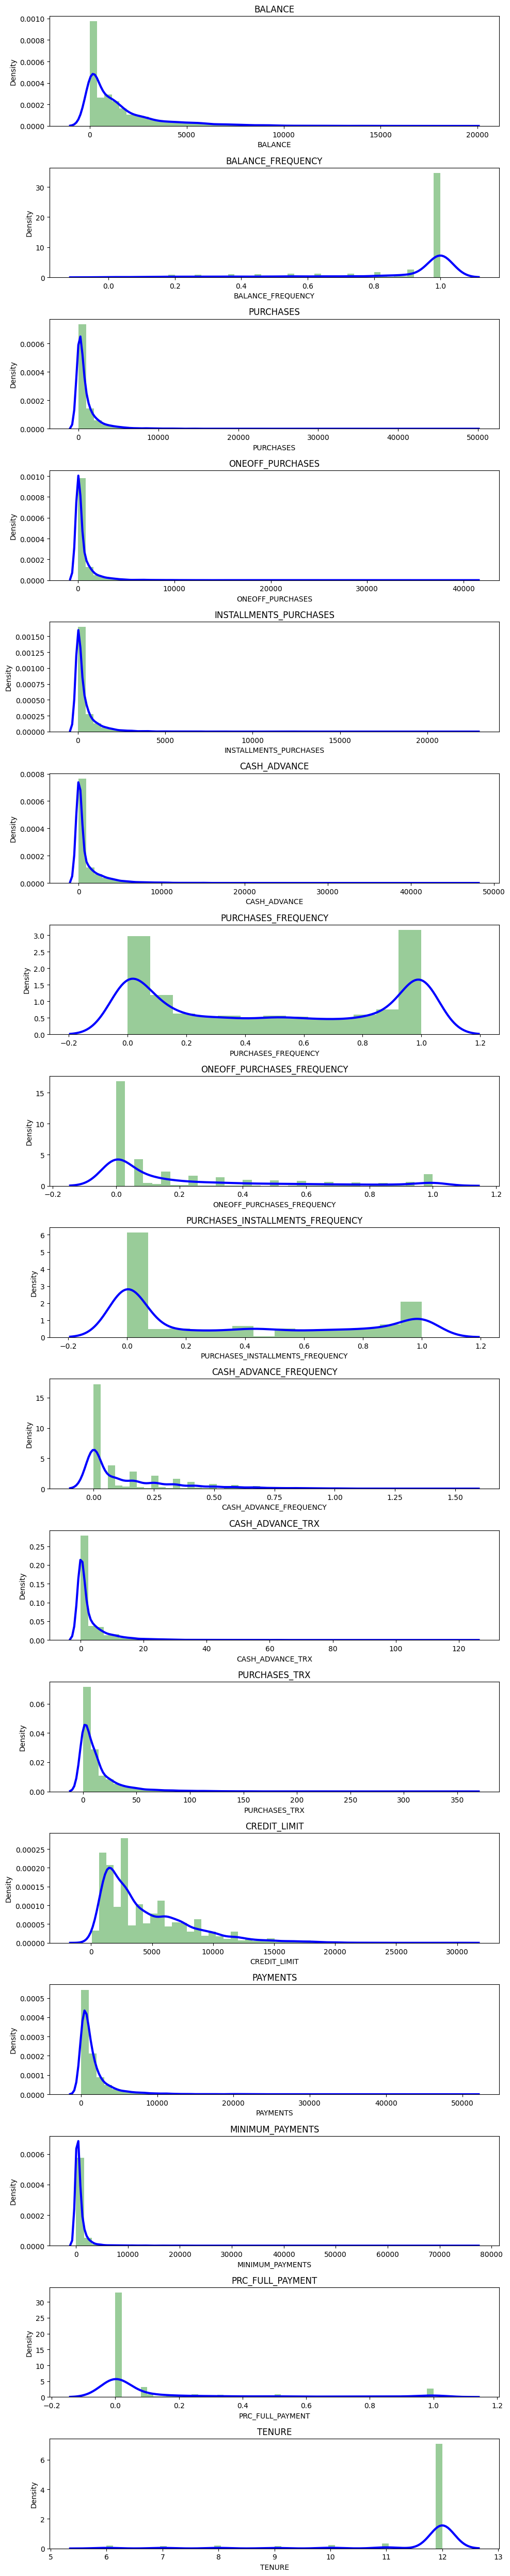

In [35]:
plt.figure(figsize = (10,50))
for i in range(17):
  plt.subplot(17, 1 , i+1)
  sns.distplot(df[df.columns[i]], kde_kws={'color' : 'b', 'lw' : 3, 'label' : 'KDE'}, hist_kws = {'color' : 'g'})
  plt.title(df.columns[i])

plt.tight_layout()

In [36]:
corr = df.corr()

# Create the heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='aggrnyl',
    reversescale=False,
    annotation_text=corr.round(2).values,
    hoverinfo='z'
)

# Customize the layout
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=1200,
    height=1200,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    )
)

# Display the heatmap
fig.show()

The correlation heatmap displays the relationships between various features or variables. Here are some key insights from analyzing the heatmap:

1. Tenure has a moderately positive correlation with PRC_FULL_PAYMENT and
MINIMUM_PAYMENTS, suggesting that customers with longer tenure tend to make full payments and have higher minimum payments.

2. PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES have strong positive correlations with each other, indicating that customers who make more purchases are likely to make both one-off and installment purchases.

3. CASH_ADVANCE and CASH_ADVANCE_FREQUENCY have a strong positive correlation, implying that customers who frequently take cash advances tend to have higher cash advance amounts.

4. BALANCE has a moderately negative correlation with TENURE, suggesting that customers with longer tenure tend to have lower account balances.

5. CREDIT_LIMIT has a moderate positive correlation with PAYMENTS, indicating that customers with higher credit limits tend to make higher payments.

6. PURCHASES_FREQUENCY has a relatively weak correlation with most other features, suggesting that the frequency of purchases may not be strongly related to other factors.

7. BALANCE_FREQUENCY has a weak positive correlation with BALANCE, implying that customers who frequently check their balance may have higher account balances.

8. The heatmap reveals both positive and negative correlations between different features, which can provide insights into customer behavior and potential risk factors for financial institutions.

Overall, this correlation heatmap can help identify relationships between various customer attributes and payment behaviors, potentially aiding in risk assessment, marketing strategies, and customer segmentation.

In [37]:
#Distribution of Credit Limit
fig_credit_limit = px.histogram(df, x='CREDIT_LIMIT', nbins=30, title='Distribution of Credit Limit')
fig_credit_limit.update_layout(xaxis_title='Credit Limit', yaxis_title='Count')
fig_credit_limit.show()

Here's your detailed credit limit distribution analysis broken down into key points:

* **Right-skewed distribution:** Most customers have higher credit limits, clustered around 2,000 to 5,000.
* **Peak frequency:**  The 2,000 to 5,000 credit limit range has the most customers.
* **Long tail towards higher limits:**  While less frequent, a significant number of customers have credit limits exceeding 5,000, potentially up to 20,000 or higher.
* **Sharp drop on the left:**  Fewer customers have credit limits below 2,000, with a small cluster holding very low limits (potentially near 0).
* **Creditworthy customer base:**  The right-skew suggests a generally higher credit limit population, potentially indicating creditworthy or low-risk customers.
* **Diversity within the data:**  The long tail and low-limit cluster highlight the presence of diverse credit profiles.
* **Credit limit range (0 to 30,000):**  This range provides valuable insight into the overall risk profile and allows for potential segmentation based on credit limits.

In [38]:
# Scatter Plot of Balance vs Purchases
fig_balance_vs_purchases = px.scatter(df, x='BALANCE', y='PURCHASES',
                                      title='Balance vs Purchases',
                                      trendline='ols')
fig_balance_vs_purchases.update_layout(xaxis_title='Balance', yaxis_title='Purchases')
fig_balance_vs_purchases.show()

## ***Unveiling Payment Trends: Box Plot Analysis of Tenure and Payments***

## This Python code with Plotly Express generates a box plot, visualizing the distribution of payments across different tenure lengths in your data.

In [39]:
# Box Plot of Payments by Tenure
fig_payments_by_tenure = px.box(df, x='TENURE', y='PAYMENTS',
                                title='Payments by Tenure')
fig_payments_by_tenure.update_layout(xaxis_title='Tenure (months)', yaxis_title='Payments')
fig_payments_by_tenure.show()

The box plot provides insights into the distribution of payments across different tenures in months. Here are some key observations:

1. **General Distribution**:
   - Payments for each tenure month exhibit a wide range of values, with many outliers present, particularly at the higher end of the payment spectrum.

2. **Outliers**:
   - There are several high outliers for tenures of 6, 7, 8, 9, 10, 11, and especially 12 months.
   - The highest payments are seen at the 12-month tenure, with several values exceeding 50,000.

3. **Median Payments**:
   - The median payment tends to increase slightly with longer tenure months. However, the medians remain relatively low compared to the highest outliers.

4. **Spread and Variability**:
   - The interquartile range (IQR) varies slightly across different tenures, with a noticeable increase in the 12-month tenure, indicating greater variability in payments at this tenure.
   - The IQR and whiskers suggest that most payments are concentrated in the lower range, with the bulk of payments being relatively small and a few high-value outliers stretching the distribution.

5. **Comparisons Across Tenures**:
   - The 12-month tenure stands out with a significantly higher number of high outliers compared to other tenures.
   - Payments for tenures from 6 to 11 months show some high outliers but are less frequent and generally lower than those for the 12-month tenure.

In summary, while payments tend to be clustered in the lower range for all tenures, the 12-month tenure shows a marked increase in variability and the presence of high outliers, suggesting that longer tenures may be associated with higher payment amounts, but also with greater dispersion.

## ***Tenure's Impact: Bar Chart Reveals Total Purchases by Tenure Group***

##This Python code leverages Plotly Express to create a bar chart, effectively comparing the total purchase amounts across different tenure lengths within your data set.

In [40]:
# Bar Chart of Total Purchases by Tenure
total_purchases_tenure = df.groupby('TENURE')['PURCHASES'].sum().reset_index()
fig_total_purchases_tenure = px.bar(total_purchases_tenure, x='TENURE', y='PURCHASES',
                                    title='Total Purchases by Tenure')
fig_total_purchases_tenure.update_layout(xaxis_title='Tenure (months)', yaxis_title='Total Purchases')
fig_total_purchases_tenure.show()

The bar chart titled "Total Purchases by Tenure" shows the total number of purchases made by customers grouped by their tenure in months. Here are the key insights from the chart:

1. **Dominance of 12-Month Tenure**: The most significant insight is that customers with a tenure of 12 months have made an overwhelmingly higher number of purchases compared to any other tenure group. The total purchases for the 12-month tenure group are substantially higher than those for the 6- to 11-month tenure groups.

2. **Minimal Purchases for Other Tenures**: For tenures ranging from 6 to 11 months, the total purchases are almost negligible in comparison to the 12-month tenure group. Each of these months shows very low purchase activity.

3. **Potential Seasonality or Retention Factor**: The sharp increase in purchases at the 12-month mark could indicate a seasonal factor or a significant retention milestone where customers tend to make a large purchase or a series of purchases after completing a year with the company.

4. **Customer Loyalty and Long-Term Engagement**: The data might suggest that customers who stay with the company for a year are more likely to make significant purchases, indicating strong customer loyalty and engagement at the 12-month mark.

These insights could be valuable for understanding customer behavior and planning marketing strategies, especially focusing on retention programs and incentives for long-term customers.

## ***Full Payment Breakdown: Pie Chart Unveils Payment Proportion Trends***

## This Python code with Plotly Express constructs a visually appealing pie chart, highlighting the proportion of full payments compared to partial payments within your dataset, with clear labels and percentages for easy interpretation.

In [41]:
import plotly.express as px
import plotly.graph_objs as go

# Pie Chart of Full Payment Proportion
full_payment_proportion = df['PRC_FULL_PAYMENT'].apply(lambda x: 'Full Payment' if x == 1 else 'Partial Payment').value_counts().reset_index()
full_payment_proportion.columns = ['Payment Type', 'Count']
full_payment_proportion = full_payment_proportion.sort_values(by='Count', ascending=False)  # Sort by count

# Create the pie chart
fig_full_payment_proportion = px.pie(
    full_payment_proportion,
    values='Count',
    names='Payment Type',
    title='Proportion of Full Payments',
    color='Payment Type',
    color_discrete_map={'Full Payment': 'green', 'Partial Payment': 'orange'},
    hole=0.6  # Adjust the hole size
)

# Add labels and percentages
fig_full_payment_proportion.update_traces(
    textinfo='percent+value',
    textfont_size=14,
    hoverinfo='label+percent+value',
    marker=dict(
        line=dict(color='#FFFFFF', width=2)  # Add contour to slices
    )
)

# Create a sunburst plot as shadow
fig_shadow = px.sunburst(
    full_payment_proportion,
    names='Payment Type',
    values='Count',
    color_discrete_sequence=['gray', 'gray']
)
fig_shadow.update_traces(marker=dict(line=dict(width=0)))
fig_shadow.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Add the shadow to the pie chart
fig_full_payment_proportion.add_trace(fig_shadow.data[0])

# Customize layout
fig_full_payment_proportion.update_layout(
    showlegend=True,
    legend=dict(
        x=0.8,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=14,
            color='black'
        )
    ),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the chart
fig_full_payment_proportion.show()

The donut chart titled "Proportion of Full Payments" shows the breakdown of payments into two categories: partial payments and full payments. Here are the key insights from the chart:

1. **High Proportion of Full Payments**: The chart reveals that 94.5% of the payments (8462 out of the total) are full payments. This indicates that the vast majority of customers are completing their payments in full rather than opting for partial payments.

2. **Low Proportion of Partial Payments**: Only 5.45% of the payments (488 out of the total) are partial payments. This suggests that a very small segment of customers is choosing to make partial payments.

3. **Customer Payment Behavior**: The overwhelming preference for full payments could indicate that customers find it convenient or preferable to settle their dues completely rather than spreading them out.

4. **Implications for Business Strategy**: Understanding that most customers make full payments can help in designing payment plans, promotional offers, and customer service strategies. For example, businesses might focus more on incentives for early full payments rather than structuring numerous partial payment options.

Overall, the chart highlights a strong tendency among customers to pay in full, which is an important factor for financial planning and policy-making for the business.

## ***Exploring Payment Landscape: Unveiling Payment Distribution with Histogram***

## This Python code utilizes Plotly Express to create a histogram, visualizing the frequency of different payment amounts across your data, providing insights into the distribution of payments.

In [42]:
# Histogram of Payments
fig_payments_histogram = px.histogram(df, x='PAYMENTS', nbins=30, title='Distribution of Payments')
fig_payments_histogram.update_layout(xaxis_title='Payments', yaxis_title='Count')
fig_payments_histogram.show()

The histogram shows the distribution of payment amounts. Here are some key insights:

1. **Skewed Distribution**: The distribution of payments is heavily right-skewed, with a large number of payments concentrated at the lower end of the range. This indicates that most payments are relatively small.

2. **High Frequency of Low Payments**: The highest frequency of payments is at the very low end of the scale, with counts exceeding 4000 in the first bin. This suggests that the majority of transactions involve small amounts of money.

3. **Gradual Decrease**: As the payment amounts increase, the frequency of payments decreases significantly. There are very few payments in the higher ranges.

4. **Long Tail**: The histogram has a long tail extending towards higher payment amounts, indicating that while large payments are rare, they do occur.

5. **Bins and Range**: The x-axis shows the payment amounts ranging from 0 to around 50,000, and the y-axis shows the count of payments within each bin. The majority of counts fall within the first few bins, reinforcing the observation of low payment amounts being most common.

In summary, the histogram indicates that most payments are small, with a few larger payments occurring infrequently, creating a right-skewed distribution.

In [43]:
# Box Plot of Minimum Payments by Credit Limit
fig_min_payments_credit_limit = px.box(df, x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS',
                                       title='Minimum Payments by Credit Limit')
fig_min_payments_credit_limit.update_layout(xaxis_title='Credit Limit', yaxis_title='Minimum Payments')
fig_min_payments_credit_limit.show()

Based on the scatter plot, here are the key insights:

1. **Concentration of Data Points**: The majority of data points are concentrated at lower credit limits (below 10k) and lower minimum payments (below 10k). This indicates that most individuals have lower credit limits and correspondingly lower minimum payments.

2. **Wide Range of Minimum Payments**: Despite most minimum payments being low, there are some instances where minimum payments are quite high (up to 80k), even for credit limits that are not the highest. This suggests a few outliers with unusually high minimum payments relative to their credit limits.

3. **Sparse Distribution at Higher Credit Limits**: As the credit limit increases beyond 10k, the number of data points decreases. There are fewer individuals with higher credit limits, and these individuals also tend to have lower minimum payments compared to their credit limit.

4. **Outliers and Variability**: There are several outliers where minimum payments are significantly higher than the typical range for given credit limits. This indicates variability and exceptions in how minimum payments are determined or managed.

5. **Overall Trend**: There does not seem to be a clear linear relationship between credit limit and minimum payments, but rather a clustering of low credit limits with low minimum payments, with occasional high minimum payments scattered across different credit limits.

In summary, the scatter plot reveals that while most individuals have low credit limits and low minimum payments, there are notable exceptions where high minimum payments are observed, indicating significant variability and some outliers in the data.

# **Data Dashboard**

In [ ]:
!pip install dash dash_bootstrap_components

# **Explore Payment Patterns, Limits, and Purchase Trends (Dash)**



This comprehensive credit card analysis dashboard empowers you to uncover hidden patterns and gain actionable insights. Built with Plotly.express and Dash, it provides a rich set of interactive visualizations that shed light on various aspects of credit card usage.

* **Explore Payment Dynamics:** Analyze payment trends across different customer segments. See how payments vary by tenure length and identify potential areas for improvement in payment consistency.
* **Understand Credit Limits:** Visualize the distribution of credit limits and their impact on payment behavior. Uncover correlations between credit limits and purchase patterns to gain a deeper understanding of customer risk profiles.
* **Unveil Purchase Trends:** Delve into customer purchase behaviors. Analyze the frequency and types of purchases (one-off vs. installments) to understand spending habits and identify potential areas for targeted marketing campaigns.
* **Investigate Cash Advance Activity:** Explore the frequency and volume of cash advance transactions. Gain insights into customer cash flow needs and potential areas of risk associated with cash advance usage.
* **Identify Key Relationships:** Utilize the correlation heatmap to discover hidden connections between various credit card metrics. This can reveal valuable insights into factors influencing customer behavior and creditworthiness.

By leveraging the interactive nature of this dashboard, you can gain a holistic understanding of your customer base and make data-driven decisions to optimize credit card offerings and improve customer experiences.


In [ ]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px

# Load the dataset

data = pd.read_csv('/content/Marketing_data.csv')

# Create the figures
fig_balance_freq = px.histogram(data, x='BALANCE_FREQUENCY', nbins=14, title='Distribution of Balance Frequencies')
fig_oneoff_vs_installments = px.scatter(data, x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', title='One-Off vs Installment Purchases', trendline='ols')
fig_cash_advance_freq = px.histogram(data, x='CASH_ADVANCE_FREQUENCY', nbins=20, title='Distribution of Cash Advance Frequency')
fig_cash_advance_trx = px.histogram(data, x='CASH_ADVANCE_TRX', nbins=20, title='Distribution of Cash Advance Transactions')
fig_purchase_freq = px.density_heatmap(data, x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', title='Purchase Frequency vs Installments Frequency', nbinsx=20, nbinsy=20)
correlation_matrix = data.corr(numeric_only=True)
fig_corr_heatmap = px.imshow(correlation_matrix, text_auto=True, title='Correlation Heatmap', width=1200, height=1200)
fig_payments_tenure = px.line(data, x='TENURE', y='PAYMENTS', title='Payments by Tenure').update_layout(height=600, width=800)
fig_min_payments = px.histogram(data, x='MINIMUM_PAYMENTS', nbins=10, title='Distribution of Minimum Payments')

# Create the pie chart
fig_full_payment_proportion = px.pie(
    full_payment_proportion,
    values='Count',
    names='Payment Type',
    title='Proportion of Full Payments',
    color='Payment Type',
    color_discrete_map={'Full Payment': 'green', 'Partial Payment': 'orange'},
    hole=0.6  # Adjust the hole size
)

# Add labels and percentages
fig_full_payment_proportion.update_traces(
    textinfo='percent+value',
    textfont_size=14,
    hoverinfo='label+percent+value',
    marker=dict(
        line=dict(color='#FFFFFF', width=2)  # Add contour to slices
    )
)

# Create a sunburst plot as shadow
fig_shadow = px.sunburst(
    full_payment_proportion,
    names='Payment Type',
    values='Count',
    color_discrete_sequence=['gray', 'gray']
)
fig_shadow.update_traces(marker=dict(line=dict(width=0)))
fig_shadow.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Add the shadow to the pie chart
fig_full_payment_proportion.add_trace(fig_shadow.data[0])

# Customize layout
fig_full_payment_proportion.update_layout(
    showlegend=True,
    legend=dict(
        x=0.8,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=14,
            color='black'
        )
    ),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Histogram of Payments
fig_payments_histogram = px.histogram(data, x='PAYMENTS', nbins=30, title='Distribution of Payments')
fig_payments_histogram.update_layout(xaxis_title='Payments', yaxis_title='Count')

# Box Plot of Minimum Payments by Credit Limit
fig_min_payments_credit_limit = px.box(data, x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS',
                                       title='Minimum Payments by Credit Limit')
fig_min_payments_credit_limit.update_layout(xaxis_title='Credit Limit', yaxis_title='Minimum Payments')


app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container(fluid=True, children=[
    dbc.Row([
        dbc.Col(html.H1("Credit Card Analysis Dashboard", className="text-center my-4"), width=12)
    ]),
    dbc.Row([
        dbc.Col(
            dbc.ButtonGroup([
                dbc.Button("Credit Limits", id='btn_credit_limit', color="primary", className="mr-1 mb-2"),
                dbc.Button("Balance vs Purchases", id='btn_balance_vs_purchases', color="primary", className="mr-1 mb-2"),
                dbc.Button("Payments Analysis", id='btn_payments_analysis', color="primary", className="mr-1 mb-2"),
                dbc.Button("Purchases by Tenure", id='btn_purchases_by_tenure', color="primary", className="mr-1 mb-2"),
                dbc.Button("Balance Frequency", id='btn_balance_freq', color="primary", className="mr-1 mb-2"),
                dbc.Button("One-Off vs Installments", id='btn_oneoff_vs_installments', color="primary", className="mr-1 mb-2"),
                dbc.Button("Cash Advance", id='btn_cash_advance', color="primary", className="mr-1 mb-2"),
                dbc.Button("Purchase Frequency", id='btn_purchase_freq', color="primary", className="mr-1 mb-2"),
                dbc.Button("Correlation Heatmap", id='btn_corr_heatmap', color="primary", className="mr-1 mb-2"),
                dbc.Button("Payments by Tenure", id='btn_payments_tenure', color="primary", className="mr-1 mb-2"),
                dbc.Button("Minimum Payments", id='btn_min_payments', color="primary", className="mr-1 mb-2")
            ], vertical=True, className="btn-group-vertical w-100"), width=2
        ),
        dbc.Col(html.Div(id='content', style={'padding': '20px'}), width=10)
    ])
])

# Callbacks for buttons
@app.callback(
    Output('content', 'children'),
    [Input('btn_credit_limit', 'n_clicks'),
     Input('btn_balance_vs_purchases', 'n_clicks'),
     Input('btn_payments_analysis', 'n_clicks'),
     Input('btn_purchases_by_tenure', 'n_clicks'),
     Input('btn_balance_freq', 'n_clicks'),
     Input('btn_oneoff_vs_installments', 'n_clicks'),
     Input('btn_cash_advance', 'n_clicks'),
     Input('btn_purchase_freq', 'n_clicks'),
     Input('btn_corr_heatmap', 'n_clicks'),
     Input('btn_payments_tenure', 'n_clicks'),
     Input('btn_min_payments', 'n_clicks')]
)
def render_content(btn_credit_limit, btn_balance_vs_purchases, btn_payments_analysis, btn_purchases_by_tenure,
                   btn_balance_freq, btn_oneoff_vs_installments, btn_cash_advance, btn_purchase_freq,
                   btn_corr_heatmap, btn_payments_tenure, btn_min_payments):
    ctx = dash.callback_context
    if not ctx.triggered:
        button_id = 'btn_credit_limit'
    else:
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    content = None
    if button_id == 'btn_credit_limit':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Credit Limits", className="card-title"),
                dcc.Graph(figure=fig_credit_limit)
            ])
        )
    elif button_id == 'btn_balance_vs_purchases':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Balance vs Purchases", className="card-title"),
                dcc.Graph(figure=fig_balance_vs_purchases)
            ])
        )
    elif button_id == 'btn_payments_analysis':
        content = html.Div([
            dbc.Row([
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Payments by Tenure", className="card-title"),
                            dcc.Graph(figure=fig_payments_by_tenure)
                        ])
                    ), width=6
                ),
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Full Payment Proportion", className="card-title"),
                            dcc.Graph(figure=fig_full_payment_proportion)
                        ])
                    ), width=6
                )
            ]),
            dbc.Row([
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Payments Histogram", className="card-title"),
                            dcc.Graph(figure=fig_payments_histogram)
                        ])
                    ), width=12
                )
            ]),
            dbc.Row([
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Min Payments by Credit Limit", className="card-title"),
                            dcc.Graph(figure=fig_min_payments_credit_limit)
                        ])
                    ), width=12
                )
            ])
        ])
    elif button_id == 'btn_purchases_by_tenure':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Total Purchases by Tenure", className="card-title"),
                dcc.Graph(figure=fig_total_purchases_tenure)
            ])
        )
    elif button_id == 'btn_balance_freq':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Distribution of Balance Frequencies", className="card-title"),
                dcc.Graph(figure=fig_balance_freq)
            ])
        )
    elif button_id == 'btn_oneoff_vs_installments':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("One-Off vs Installment Purchases", className="card-title"),
                dcc.Graph(figure=fig_oneoff_vs_installments)
            ])
        )
    elif button_id == 'btn_cash_advance':
        content = html.Div([
            dbc.Row([
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Cash Advance Frequency", className="card-title"),
                            dcc.Graph(figure=fig_cash_advance_freq)
                        ])
                    ), width=6
                ),
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody([
                            html.H4("Cash Advance Transactions", className="card-title"),
                            dcc.Graph(figure=fig_cash_advance_trx)
                        ])
                    ), width=6
                )
            ])
        ])
    elif button_id == 'btn_purchase_freq':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Purchase Frequency vs Installments Frequency", className="card-title"),
                dcc.Graph(figure=fig_purchase_freq)
            ])
        )
    elif button_id == 'btn_corr_heatmap':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Correlation Heatmap", className="card-title"),
                dcc.Graph(figure=fig_corr_heatmap)
            ])
        )
    elif button_id == 'btn_payments_tenure':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Payments by Tenure", className="card-title"),
                dcc.Graph(figure=fig_payments_tenure)
            ])
        )
    elif button_id == 'btn_min_payments':
        content = dbc.Card(
            dbc.CardBody([
                html.H4("Distribution of Minimum Payments", className="card-title"),
                dcc.Graph(figure=fig_min_payments)
            ])
        )

    return content

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Here are the insights from the visualizations:

1. **Distribution of Balance Frequencies**:
   - The histogram shows the distribution of balance frequencies among customers. Most customers have a balance frequency close to 1, indicating they frequently maintain a balance.

2. **One-Off vs Installment Purchases**:
   - The scatter plot with a trendline shows the relationship between one-off purchases and installment purchases. There is a positive correlation, indicating that customers who make one-off purchases also tend to make installment purchases.

3. **Distribution of Cash Advance Frequency**:
   - The histogram shows the distribution of cash advance frequencies. Most customers rarely use cash advances, with a frequency close to 0.

4. **Distribution of Cash Advance Transactions**:
   - The histogram shows the distribution of the number of cash advance transactions. Most customers have very few cash advance transactions.

5. **Purchase Frequency vs Installments Frequency**:
   - The density heatmap shows the relationship between purchase frequency and installment purchase frequency. There is a concentration of customers with low purchase and installment frequencies.

6. **Correlation Heatmap**:
   - The heatmap shows the correlation between different numerical features in the dataset. Notable correlations include:
     - A strong positive correlation between purchases and one-off purchases.
     - A strong positive correlation between purchases and installment purchases.
     - A strong positive correlation between payments and credit limit.

7. **Payments by Tenure**:
   - The line plot shows the relationship between payments and tenure. There is no clear trend, indicating that payments do not vary significantly with tenure.

8. **Distribution of Minimum Payments**:
   - The histogram shows the distribution of minimum payments. There is a wide range of minimum payments, with a concentration of customers making lower minimum payments.

# Model Selection and Training

## **K-Means Clustering: Grouping Your Data Like a Pro**

K-Means Clustering is an unsupervised machine learning technique that helps you group similar data points together. Imagine sorting a basket of fruits: oranges with oranges, apples with apples. K-Means does this automatically!

* **Uncover Hidden Patterns:** Identify natural clusters within your data without needing pre-labeled categories.
* **Simplify Complex Data:** Group similar data points, making large datasets easier to analyze and visualize.
* **Effective for Various Tasks:** Useful for customer segmentation, image compression, and anomaly detection.

K-Means is a powerful tool for understanding the structure of your data and making data-driven decisions.


## **Standardizing Features for Machine Learning (StandardScaler)**

###This code ensures all features in our data are on a similar scale by fitting a standardizer and then transforming the data in our DataFrame.


In [44]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [45]:
df_scaled.shape

(8950, 17)

In [46]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [47]:
score_1 = []



## **Generating a Sequence for Iteration (range_values)**
###This line creates a variable named `range_values` that holds an ordered list of numbers from 1 to 19 using Python's `range` function, which will be useful for iterating through elements in upcoming parts of my code.


In [48]:
range_values = range(1,20)

##Exploring Optimal K-Means Clusters (Looping through k Values)

###This code iterates through a range of possible cluster numbers (`k`) using a loop. For each `k`, it creates a KMeans model, fits it to the scaled data (`df_scaled`), and stores the inertia score (a measure of within-cluster variation) in a list named `score_1`. This helps us evaluate the best number of clusters for our data.


In [49]:
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  score_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## **Visualizing WCSS for K-Means Elbow Method (Plotly)**

### Here, we leverage Plotly to create a scatter plot. The X-axis represents the number of clusters (`k`) explored in the loop, while the Y-axis shows the corresponding WCSS (Within-Cluster Sum of Squares) values stored in `score_1`. This plot, often called the Elbow Method plot, helps us identify the optimal number of clusters by looking for the 'elbow' where the rate of decrease in WCSS slows down, indicating a good balance between within-cluster similarity and the number of clusters. The blue line and markers enhance the visualization.


In [50]:
trace = go.Scatter(
    x=list(range(1, len(score_1) + 1)),  # X-axis values (number of clusters)
    y=score_1,  # Y-axis values (WCSS)
    mode='lines+markers',
    marker=dict(
        color='blue',
        symbol='x',
        size=10
    ),
    line=dict(
        color='blue',
        width=2
    )
)

layout = go.Layout(
    title='Finding the Right Number of Clusters',
    xaxis=dict(
        title='Clusters',
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        title='WCSS'
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

# **So here we can see that the elbow point in the plot occurs around 5 or 6 clusters, suggesting that as the optimal number of clusters for this dataset.**

## **Unveiling Data Segments with K-Means Clustering**

### This code applies the K-Means clustering algorithm with 6 pre-defined clusters (`kmeans = KMeans(6)`) to our standardized data (`df_scaled`). The `fit` method assigns each data point in `df_scaled` to its most similar cluster, effectively grouping the data into 6 categories. The resulting cluster labels are stored in the `labels` variable, providing valuable insights into the inherent structures within our data.


In [51]:
kmeans = KMeans(6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning





## Unveiling Cluster Center Locations (`.shape`)

### This code snippet, `.shape`, reveals the dimensions of the `kmeans.cluster_centers_` attribute. This attribute holds the coordinates of all cluster centers in a NumPy array, providing insight into the number of clusters and the features they represent.


In [52]:
kmeans.cluster_centers_.shape

(6, 17)

In [53]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.359076         -0.449171  -0.284570        -0.207210   
1 -0.221826         -0.296720  -0.338145        -0.223334   
2  1.923051          0.337717  11.212042        10.600367   
3  1.559119          0.404597  -0.238793        -0.172104   
4  0.476381          0.454737   1.685471         1.452291   
5 -0.367265          0.205780  -0.002276        -0.121322   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.291842     0.031429           -0.210184   
1              -0.389083    -0.184372           -0.806323   
2               7.033118     0.419625            1.046983   
3              -0.248518     1.800957           -0.508238   
4               1.317046    -0.235465            1.151209   
5               0.217327    -0.381850            0.943950   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.273588                        -0.242180   
1                  -0.377884                        -0.727568   
2                   1.915501                         0.981334   
3                  -0.217810                        -0.452151   
4                   1.801625                         0.938334   
5                   0.105269                         0.889696   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.257564        -0.026531     -0.387489    -0.554851   
1              -0.111054        -0.158021     -0.469677    -0.285057   
2              -0.258912         0.061229      5.362438     3.044064   
3               1.786875         1.739849     -0.288930     0.909172   
4              -0.338950        -0.254597      1.991411     1.056845   
5              -0.488250        -0.369997      0.186837    -0.171721   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.389222        -0.216908         0.016233 -3.131323  
1 -0.236007        -0.102256        -0.276938  0.269704  
2  8.098975         1.127533         1.110132  0.310863  
3  0.694088         0.541405        -0.406952  0.087855  
4  0.905718         0.175506         0.467499  0.312440  
5 -0.205213        -0.080924         0.361876  0.269774

In [54]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   817.087814          0.770866    395.217470       248.510873   
1  1102.763635          0.806980    280.753666       221.748351   
2  5567.142164          0.957273  24957.905000     18186.875667   
3  4809.649098          0.973116    493.019304       306.780734   
4  2556.022451          0.984994   4604.239380      3002.942608   
5   800.043424          0.926018    998.341634       391.066996   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             147.158404  1044.779149            0.405994   
1              59.224375   592.234588            0.166734   
2            6771.029333  1858.844605            0.910556   
3             186.335491  4755.563032            0.286370   
4            1602.056266   485.089582            0.952386   
5             607.593325   178.114725            0.869203   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.120841                         0.268189   
1                   0.089728                         0.075283   
2                   0.773889                         0.754444   
3                   0.137481                         0.184741   
4                   0.739917                         0.737355   
5                   0.233861                         0.718025   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.186685         3.067771      5.078313   2475.674372   
1               0.112921         2.170448      3.035418   3457.296624   
2               0.083333         3.666667    148.000000  15570.000000   
3               0.492716        15.122021      7.528122   7802.387555   
4               0.067317         1.511392     64.208861   8339.683544   
5               0.037440         0.723867     19.353907   3869.657600   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    606.385662       338.934484         0.158462   7.326807  
1   1049.927133       606.378340         0.072715  11.878251  
2  25178.882690      3475.059479         0.478409  11.933333  
3   3742.461159      2107.821212         0.034688  11.634890  
4   4355.109391      1254.302477         0.290450  11.935443  
5   1139.071024       656.138620         0.259557  11.878345

In [55]:
labels.shape

(8950,)

In [56]:
labels.max()

5

In [57]:
labels.min()

0

In [58]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([4, 0, 5, ..., 1, 4, 4], dtype=int32)

In [59]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster' : labels})], axis = 1)
df_cluster

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        3  
2      622.066742        627.284787          0.000000      12        5  
3        0.000000        312.343947          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        0  
89

In [61]:
# Loop through each column to create subplots
for i in df.columns:
    fig = make_subplots(rows=1, cols=6, subplot_titles=[f'Cluster {j}' for j in range(8)])

    for j in range(6):
        cluster = df_cluster[df_cluster['cluster'] == j]
        hist = go.Histogram(x=cluster[i], nbinsx=20, name=f'Cluster {j}')
        fig.add_trace(hist, row=1, col=j+1)

    fig.update_layout(title_text=f'{i} Distribution by Cluster', height=400, width=3000, showlegend=False)
    fig.show()


# 2. Auto Encoders

## **Importing Essential Building Blocks for Deep Learning (Keras)**

## This code imports a collection of essential functions and classes from the Keras library to construct and train deep learning models. It includes components for defining layers (e.g., `Conv2D`, `Dense`), activation functions (`Activation`), optimizers (`SGD`), and model building tools (`Model`, `load_model`). Notably, the `glorot_uniform` initializer helps set initial weights for efficient training. This comprehensive set of tools empowers you to design and implement convolutional neural networks (CNNs) for various image recognition or image processing tasks.


In [62]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

## Building a Deep Autoencoder for Feature Extraction (Keras Functional API)

## This code snippet constructs a deep autoencoder architecture using Keras' functional API. Here's a breakdown of the steps:

1. **Input Layer:** `input_df = Input(shape=(17,))` defines the input layer, which takes data with 17 features.
2. **Encoding Phase:**
    - `x = Dense(7, activation='relu')(...):` Creates a hidden layer with 7 neurons and a ReLU activation function.
    - `x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(...):` Adds three hidden layers, each with 500 neurons, ReLU activation, and Glorot uniform initialization for efficient training.
    - `encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x):` Defines the encoded representation with 10 neurons and ReLU activation, capturing compressed features.
3. **Decoding Phase (Mirrored):**
    - `x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(...):` and subsequent layers mirror the encoding phase in reverse order, progressively reconstructing the original data.
    - `decoded = Dense(17, kernel_initializer='glorot_uniform')(x):` The final layer has 17 neurons with no activation (linear output) to match the input dimension.
4. **Autoencoder Model:** `autoencoder = Model(input_df, decoded)` combines the encoder and decoder paths into a single autoencoder model.
5. **Encoder Model (Optional):** `encoder = Model(input_df, encoded)` creates a separate encoder model for potential feature extraction tasks.
6. **Compilation:** `autoencoder.compile(optimizer='Adam', loss='mean_squared_error')` configures the autoencoder for training with the Adam optimizer and mean squared error loss function, aiming to minimize the reconstruction error between the input and output.

This deep autoencoder is designed to learn compressed representations (encoded features) of the 17-dimensional data, potentially useful for dimensionality reduction or feature extraction in downstream tasks.


In [63]:
input_df = Input(shape = (17,))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#Autoencoder
autoencoder = Model(input_df,decoded)

#encoder
encoder = Model(input_df,encoded)

autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [64]:
df_scaled.shape

(8950, 17)

In [65]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 6s 60ms/step - loss: 0.6269
Epoch 2/25
70/70 [==============================] - 6s 82ms/step - loss: 0.3694
Epoch 3/25
70/70 [==============================] - 4s 60ms/step - loss: 0.2989
Epoch 4/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2627
Epoch 5/25
70/70 [==============================] - 5s 72ms/step - loss: 0.2213
Epoch 6/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1964
Epoch 7/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1759
Epoch 8/25
70/70 [==============================] - 5s 72ms/step - loss: 0.2018
Epoch 9/25
70/70 [==============================] - 5s 70ms/step - loss: 0.1728
Epoch 10/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1568
Epoch 11/25
70/70 [==============================] - 5s 68ms/step - loss: 0.1494
Epoch 12/25
70/70 [==============================] - 5s 72ms/step - loss: 0.1376
Epoch 13/25
70/70 [==================

In [66]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010 

In [67]:
pred = encoder.predict(df_scaled)

280/280 [==============================] - 2s 5ms/step


In [68]:
pred.shape

(8950, 10)

In [69]:
pred

array([[0.        , 0.4124246 , 0.34696504, ..., 0.        , 0.        ,
        1.7956063 ],
       [0.        , 0.8586396 , 0.10836829, ..., 0.        , 0.        ,
        1.3265733 ],
       [0.        , 1.9221938 , 0.4183666 , ..., 0.        , 0.        ,
        0.6376152 ],
       ...,
       [0.        , 1.1001116 , 1.4435371 , ..., 0.        , 0.        ,
        5.918429  ],
       [0.        , 0.74637955, 0.06971587, ..., 0.        , 0.        ,
        5.04723   ],
       [0.        , 3.801655  , 3.6223586 , ..., 0.        , 0.        ,
        8.392523  ]], dtype=float32)

In [70]:
score = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  score.append(kmeans.inertia_)

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range_values),
    y=score,
    mode='lines+markers',
    marker=dict(color='blue'),
    line=dict(color='blue'),
    name='Inertia'
))

# Update layout
fig.update_layout(
    title='Elbow Method for Optimal k',
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show plot
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [71]:
# Create the plot
fig = go.Figure()

# Add the first score trace
fig.add_trace(go.Scatter(
    x=list(range(len(score_1))),
    y=score_1,
    mode='lines+markers',
    marker=dict(color='green'),
    line=dict(color='green'),
    name='Score 1'
))

# Add the second score trace
fig.add_trace(go.Scatter(
    x=list(range(len(score))),
    y=score,
    mode='lines+markers',
    marker=dict(color='red'),
    line=dict(color='red'),
    name='Score'
))

# Update layout
fig.update_layout(
    title='KMeans Inertia Scores',
    xaxis_title='Number of Clusters',
    yaxis_title='Inertia',
    template='plotly_white'
)

# Show plot
fig.show()

## ***Applying K-means to Encoded Data***




In [72]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [73]:
kmeans.cluster_centers_.shape

(4, 10)

In [74]:
df_cluster_ed = pd.concat([df, pd.DataFrame({'cluster' : labels})], axis = 1)

In [75]:
df_cluster_ed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000        312.343947          0.000000      12        2  
4      678.334763        244.791237          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        3  
89

In [77]:
# Loop through each column to create subplots
for i in df.columns:
    fig = make_subplots(rows=1, cols=4, subplot_titles=[f'Cluster {j}' for j in range(8)])

    for j in range(4):
        cluster = df_cluster_ed[df_cluster_ed['cluster'] == j]
        hist = go.Histogram(x=cluster[i], nbinsx=20, name=f'Cluster {j}')
        fig.add_trace(hist, row=1, col=j+1)

    fig.update_layout(title_text=f'{i} Distribution by Cluster', height=400, width=3000, showlegend=False)
    fig.show()